# Ejercicio Binning, imputacion, outliers, dummies etc
El siguiente Dataset contiene detalles de 1000 potenciales compradores de bicicletas, realizaremos un análisis exploratorio del mismo, imputando las variables que correspondan.

1. ¿Cuáles de las variables contienen valores nulos?
2. ¿Está Balanceada la variable target 'Purchased Bike'?
3. Imputar los valores nulos de Gender con el valor 'X'.
4. Imputar los valores nulos y outliers de Age con la media.
5. Eliminar los registros con valor nulo en Cars.
6. Generar columnas dummy para las variables Education y Occupation.
7. Definir una estrategia de imputación para las otras variables que corresponda.
8. Finalizar el análisis exploratorio con gráficos del dataset.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
bike_buyers = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/bike_buyers.csv')

# Dataset

In [73]:
bike_buyers.describe(include='all')

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,993,989,994.000000,992.000000,1000,1000,996,991.000000,1000,1000,993.000000,1000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,535,500,NaN,NaN,306,276,682,NaN,366,508,NaN,519
mean,19965.992000,NaN,NaN,56267.605634,1.910282,NaN,NaN,NaN,1.455096,NaN,NaN,44.139980,NaN
std,5347.333948,NaN,NaN,31067.817462,1.626910,NaN,NaN,NaN,1.121755,NaN,NaN,12.338209,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,-28.000000,NaN
25%,15290.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24470.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


In [74]:
bike_buyers.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [75]:
bike_buyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


# Resolucion Punto 1
¿Cuáles de las variables contienen valores nulos?

Calcular porcentaje de valores nulos por columna

In [76]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo columnas con porcentaje mayor a 0

In [77]:
columns_with_nulls = null_percentages[null_percentages > 0]

Mostrar el resultado

In [78]:
print("Columnas con valores nulos (%):")
print(columns_with_nulls)

Columnas con valores nulos (%):
Marital Status    0.7
Gender            1.1
Income            0.6
Children          0.8
Home Owner        0.4
Cars              0.9
Age               0.7
dtype: float64


# Resolucion Punto 2
¿Está Balanceada la variable target 'Purchased Bike'?

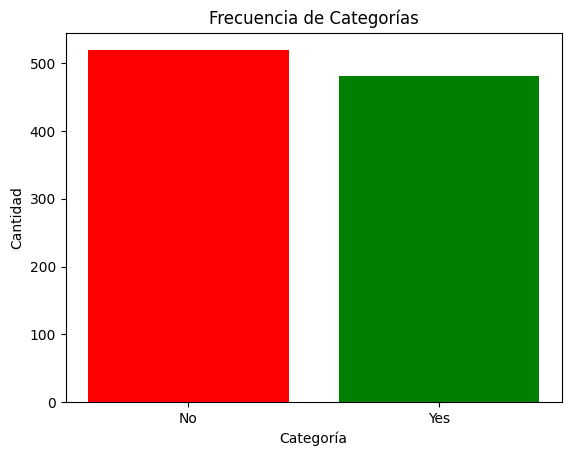

In [79]:
cateries = bike_buyers["Purchased Bike"].value_counts()
plt.bar(cateries.index, cateries.values, color=['red', 'green'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Frecuencia de Categorías')
plt.show()

In [80]:
bike_buyers["Purchased Bike"].value_counts()

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64

# Resolución Punto 3
Imputar los valores nulos de Gender con el valor 'X'

In [81]:
bike_buyers["Gender"] = bike_buyers["Gender"].fillna("X")

Calcular porcentaje de valores nulos por columna

In [82]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo la columna 'Gender'

In [83]:
gender_null_percentage = null_percentages['Gender']

Mostrar el resultado

In [84]:
print("Porcentaje de valores nulos en 'Gender':")
print(gender_null_percentage)

Porcentaje de valores nulos en 'Gender':
0.0


# Resolución Punto 4
Imputar los valores nulos y outliers de Age con la media.

## Imputacion de Valores Nulos

1. Calcular la media (ignorando nulos)

In [85]:
mean_age = bike_buyers['Age'].mean()

2. Imputar los valores nulos con la media

In [86]:
bike_buyers['Age'] = bike_buyers['Age'].fillna(mean_age)

Calcular porcentaje de valores nulos por columna

In [87]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo la columna 'Gender'

In [88]:
gender_null_percentage = null_percentages['Age']

Mostrar el resultado

In [89]:
print("Porcentaje de valores nulos en 'Age':")
print(gender_null_percentage)

Porcentaje de valores nulos en 'Age':
0.0


## Imputacion de valores outliers

### Antes de la imputacion

Semilla para reproducibilidad del jitter

In [90]:
np.random.seed(42)

Crear el gráfico

<Axes: xlabel='Age'>

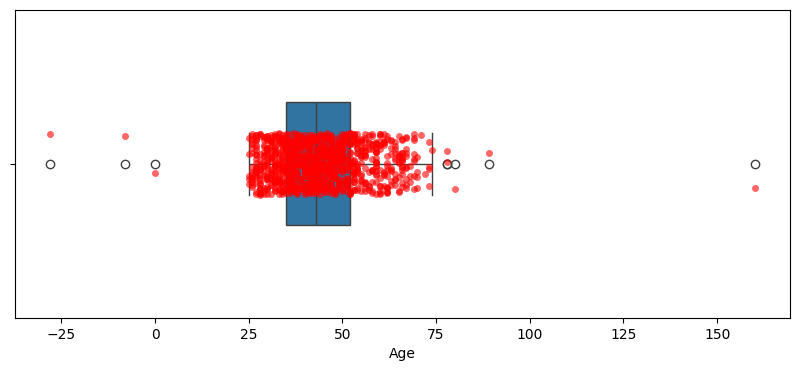

In [91]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=bike_buyers["Age"], width=0.4, showfliers=True, orient="x")
sns.stripplot(x=bike_buyers["Age"], color='red', size=5, alpha=0.6, jitter=True)

Personalizar

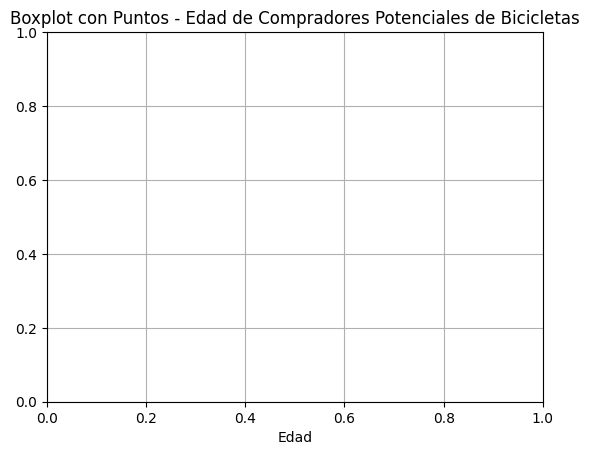

In [92]:
plt.title("Boxplot con Puntos - Edad de Compradores Potenciales de Bicicletas")
plt.xlabel("Edad")
plt.grid(True)
plt.show()

### Imputacion mediante la formula

3. Calcular límites para detectar outliers

In [93]:
Q1 = bike_buyers['Age'].quantile(0.25)
Q3 = bike_buyers['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

4. Reemplazar los outliers con la media

In [94]:
bike_buyers['Age'] = np.where(
    (bike_buyers['Age'] < lower_bound) | (bike_buyers['Age'] > upper_bound),
    mean_age,
    bike_buyers['Age']
)

### Luego de la imputacion

Semilla para reproducibilidad del jitter

In [95]:
np.random.seed(42)

Crear el gráfico

<Axes: xlabel='Age'>

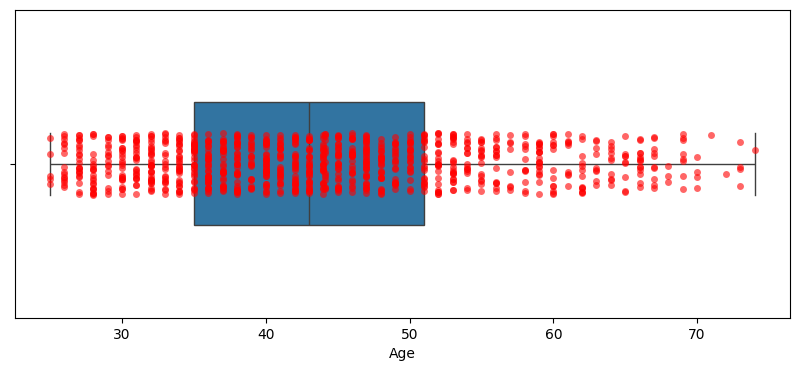

In [96]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=bike_buyers["Age"], width=0.4, showfliers=True, orient="x")
sns.stripplot(x=bike_buyers["Age"], color='red', size=5, alpha=0.6, jitter=True)

Personalizar

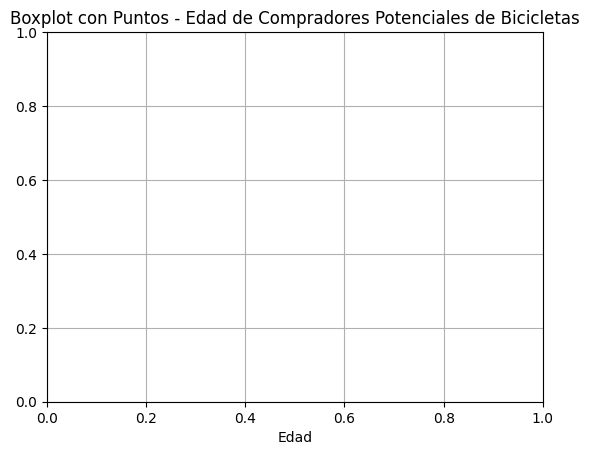

In [97]:
plt.title("Boxplot con Puntos - Edad de Compradores Potenciales de Bicicletas")
plt.xlabel("Edad")
plt.grid(True)
plt.show()

# Resolucion Punto 5
Eliminar los registros con valor nulo en Cars.

In [98]:
bike_buyers = bike_buyers.dropna(subset=['Cars'])

Calcular porcentaje de valores nulos por columna

In [99]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo la columna 'Gender'

In [100]:
gender_null_percentage = null_percentages['Cars']

Mostrar el resultado

In [101]:
print("Porcentaje de valores nulos en 'Cars':")
print(gender_null_percentage)

Porcentaje de valores nulos en 'Cars':
0.0


# Resolucion Punto 6
Generar columnas dummy para las variables Education y Occupation.

Calcular porcentaje de valores nulos por columna

In [102]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo columnas con porcentaje mayor a 0

In [103]:
columns_with_nulls = null_percentages[null_percentages > 0]

Mostrar el resultado

In [104]:
print("Columnas con valores nulos (%):")
print(columns_with_nulls)

Columnas con valores nulos (%):
Marital Status    0.706357
Income            0.605449
Children          0.807265
Home Owner        0.403633
dtype: float64


Crear dummies para las columnas 'Education' y 'Occupation'

In [105]:
bike_buyers = pd.get_dummies(bike_buyers, columns=['Education', 'Occupation'], drop_first=True)

In [106]:
bike_buyers.head()

,ID,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual
0,12496,Married,Female,40000.0,1.0,Yes,0.0,0-1 Miles,Europe,42.0,No,False,False,False,False,False,False,False,True
1,24107,Married,Male,30000.0,3.0,Yes,1.0,0-1 Miles,Europe,43.0,No,False,False,True,False,False,False,False,False
2,14177,Married,Male,80000.0,5.0,No,2.0,2-5 Miles,Europe,60.0,No,False,False,True,False,False,False,True,False
3,24381,Single,X,70000.0,0.0,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,False,False,False,False,False,False,True,False
4,25597,Single,Male,30000.0,0.0,No,0.0,0-1 Miles,Europe,36.0,Yes,False,False,False,False,False,False,False,False


# Resolucion Punto 7
Definir una estrategia de imputación para las otras variables que corresponda.

Calcular porcentaje de valores nulos por columna

In [107]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo columnas con porcentaje mayor a 0

In [108]:
columns_with_nulls = null_percentages[null_percentages > 0]

Mostrar el resultado

In [109]:
print("Columnas con valores nulos (%):")
print(columns_with_nulls)

Columnas con valores nulos (%):
Marital Status    0.706357
Income            0.605449
Children          0.807265
Home Owner        0.403633
dtype: float64


## Imputacion Marital Status
Se reemplaza los nulos por el valor moda

In [110]:
most_common_marital = bike_buyers['Marital Status'].mode()[0]
bike_buyers['Marital Status'] = bike_buyers['Marital Status'].fillna(most_common_marital)

## Imputacion Income
Se reemplaza los nulos por el valor de la mediana

In [111]:
median_income = bike_buyers['Income'].median()
bike_buyers['Income'] = bike_buyers['Income'].fillna(median_income)

## Imputacion Children
Se reemplaza los nulos por el valor de la mediana

In [112]:
median_children = bike_buyers['Children'].median()
bike_buyers['Children'] = bike_buyers['Children'].fillna(median_children)

## Imputacion Home Owner
Se reemplaza los nulos por el valor moda

In [113]:
most_common_owner = bike_buyers['Home Owner'].mode()[0]
bike_buyers['Home Owner'] = bike_buyers['Home Owner'].fillna(most_common_owner)

Calcular porcentaje de valores nulos por columna

In [114]:
null_percentages = bike_buyers.isna().sum() / bike_buyers.shape[0] * 100

Filtrar solo columnas con porcentaje mayor a 0

In [115]:
columns_with_nulls = null_percentages[null_percentages > 0]

Mostrar el resultado

In [116]:
print("Columnas con valores nulos (%):")
print(columns_with_nulls)

Columnas con valores nulos (%):
Series([], dtype: float64)


# Resolucion Punto 8
Finalizar el análisis exploratorio con gráficos del dataset.

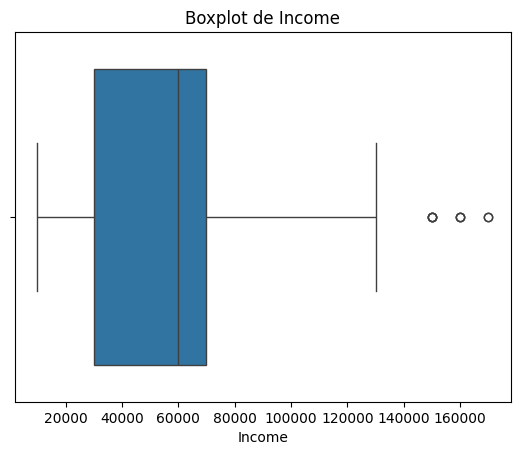

In [117]:
sns.boxplot(x=bike_buyers['Income'])
plt.title('Boxplot de Income')
plt.show()